In [33]:
import pandas as pd
import math, time, random, datetime
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.metrics import r2_score
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

In [34]:
categorical_list = ["genres", "languages", "production_countries"]

In [35]:
def draw_graph(data):
    fig, ax = plt.subplots(3, 2, figsize=(9, 9))

    #fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(20, 20))
    fig.suptitle('Input - Output Sensor Values')

    month = sns.barplot(x="month", y="first_weekend_box_office_US", data=data,  ax=ax[0,0])
    #ax1.plot(data["dateTime"], data["input1"])
    month.set_title('Month - First Weekend Box Office')
    month.axes.xaxis.set_visible(False)
    month.axes.yaxis.set_visible(False)

    year = sns.barplot(x="year", y="first_weekend_box_office_US", data=data, ax=ax[1,0])
    # ax1.plot(data["dateTime"], data["input1"])
    year.set_title('Year - First Weekend Box Office')
    year.axes.xaxis.set_visible(False)
    year.axes.yaxis.set_visible(False)

    saloons = sns.swarmplot(x="opening_weekend_theaters_US", y="first_weekend_box_office_US", data=data, ax=ax[0,1])
    # ax1.plot(data["dateTime"], data["input1"])
    saloons.set_title('Saloon  - First Weekend Box Office')
    saloons.axes.xaxis.set_visible(False)
    saloons.axes.yaxis.set_visible(False)

    budget = sns.swarmplot(x="budget", y="first_weekend_box_office_US", data=data, ax=ax[1, 1])
    # ax1.plot(data["dateTime"], data["input1"])
    budget.set_title('Budget  - First Weekend Box Office')
    budget.axes.xaxis.set_visible(False)
    budget.axes.yaxis.set_visible(False)

    runtime = sns.swarmplot(x="runtime", y="first_weekend_box_office_US", data=data, ax=ax[2, 1])
    # ax1.plot(data["dateTime"], data["input1"])
    runtime.set_title('Runtime  - First Weekend Box Office')
    runtime.axes.xaxis.set_visible(False)
    runtime.axes.yaxis.set_visible(False)

    box_office_US = sns.swarmplot(x="box_office_US", y="first_weekend_box_office_US", data=data, ax=ax[2, 0])
    # ax1.plot(data["dateTime"], data["input1"])
    box_office_US.set_title('Box_office_US  - First Weekend Box Office')
    box_office_US.axes.xaxis.set_visible(False)
    box_office_US.axes.yaxis.set_visible(False)
    plt.savefig("output.png")
    plt.show()

In [36]:
def show(data, y, x):
    fig, ax = plt.subplots(5, 1, figsize=(9, 9))

    # fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(20, 20))
    fig.suptitle('Input - Output Sensor Values')
    i = 0
    for elem in x:
        if i < 5:
            month = sns.barplot(x=elem, y=y, data=data, ax=ax[i])
            # ax1.plot(data["dateTime"], data["input1"])
            month.set_title(str(elem) + ' - First Weekend Box Office')
            month.axes.xaxis.set_visible(True)
            month.axes.yaxis.set_visible(False)
            i = i +1
    plt.show()


In [37]:
def correlation(data):
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
    plt.show()

In [38]:
def sort_dict(key_count_dict):
    sorted_producer_dict = {}
    copy_key_count_dict = key_count_dict.copy()
    for value in sorted(key_count_dict.values(), reverse=True):
        key = list(copy_key_count_dict.keys())[list(copy_key_count_dict.values()).index(value)]
        sorted_producer_dict[key] = key_count_dict[key]
        copy_key_count_dict.pop(key)
    return sorted_producer_dict

In [39]:
def genre_dict_analyses(data, genre_dict):
    genres_key_count_dict = {}
    genres_keys_list = []
    for key in genre_dict:
        genres_key_count_dict[key] = len(genre_dict.get(key))
    sorted_producer_dict = sort_dict(genres_key_count_dict)
    for key in sorted_producer_dict.keys():
        genres_keys_list.append(key)
    genres_keys_list.append('first_weekend_box_office_US')
    corr_data = data[genres_keys_list].copy()
    # show(corr_data, 'first_weekend_box_office_US', genres_keys_list )
    correlation(corr_data)

In [40]:
def producer_dict_analyses(data, producer_country_dict):
    producer_country_key_count_dict = {}
    for key in producer_country_dict:
        producer_country_key_count_dict[key] = len(producer_country_dict.get(key))
    sorted_producer_dict = sort_dict(producer_country_key_count_dict)
    producer_keys_list = []
    i = 0
    for key in sorted_producer_dict.keys():
        if i < 10:
            producer_keys_list.append(key)
            i = i + 1
    producer_keys_list.append('first_weekend_box_office_US')
    corr_data = data[producer_keys_list].copy()
    correlation(corr_data)

In [41]:
def language_dict_analyses(data, language_dict):
    language_key_count_dict = {}
    for key in language_dict:
        language_key_count_dict[key] = len(language_dict.get(key))
    sorted_language_dict = sort_dict(language_key_count_dict)
    # print(sorted_language_dict)
    language_keys_list = []
    i = 0
    # list_lang = ["Portuguese", "Ukrainian", "Korean", "French", "Vietnamese", "Sign Languages", "Russian"]
    for key in sorted_language_dict.keys():
        if i < 15:
            language_keys_list.append(key)
        i = i + 1

    language_keys_list.append('first_weekend_box_office_US')
    corr_data = data[language_keys_list].copy()
    correlation(corr_data)

In [42]:
def categorical_variables(data):
    import ast
    genre_set = set()
    language_set = set()
    producer_country_set = set()

    genre_dict = {}
    language_dict = {}
    producer_country_dict = {}

    for col in data.columns:
        if col in categorical_list:
            index = 0
            for row in data[col]:
                if type(row) in (list, tuple, dict, str):
                    lists = ast.literal_eval(row)
                    for elem in lists:
                        if col == "genres":
                            genre_set.add(elem)
                            if genre_dict.get(elem):
                                data[elem][index] = 1
                                genre_list = genre_dict[elem]
                                genre_list.append(index)
                                genre_dict[elem] = genre_list
                            else:
                                data[elem] = 0
                                data[elem][index] = 1
                                genre_list = []
                                genre_list.append(index)
                                genre_dict[elem] = genre_list
                        if col == "languages":
                            language_set.add(elem)
                            if language_dict.get(elem):
                                data[elem][index] = 1
                                language_list = language_dict[elem]
                                language_list.append(index)
                                language_dict[elem] = language_list
                            else:
                                data[elem] = 0
                                data[elem][index] = 1
                                language_list = []
                                language_list.append(index)
                                language_dict[elem] = language_list
                        if col == "production_countries":
                            producer_country_set.add(elem)
                            if producer_country_dict.get(elem):
                                data[elem][index] = 1
                                producer_country_list = producer_country_dict[elem]
                                producer_country_list.append(index)
                                producer_country_dict[elem] = producer_country_list
                            else:
                                data[elem] = 0
                                data[elem][index] = 1
                                producer_country_list = []
                                producer_country_list.append(index)
                                producer_country_dict[elem] = producer_country_list

                index = index + 1

    # Genres
    genre_dict_analyses(data, genre_dict)

    # Producers
    producer_dict_analyses(data, producer_country_dict)

    # Language
    language_dict_analyses(data, language_dict)

    categorical_columns_to_drop = ["genres", "languages", "production_countries"]
    data.drop(categorical_columns_to_drop, inplace=True, axis=1)
    return data

In [43]:
def normalize(data):
    cols_to_norm = ['runtime', 'budget', 'opening_weekend_theaters_US', 'first_weekend_box_office_US', 'box_office_US']

    for col in cols_to_norm:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    return data

In [44]:
def feature_selection(normalized_data):

    X = normalized_data.drop(columns=['first_weekend_box_office_US'])
    y = normalized_data['first_weekend_box_office_US']

    bestfeatures = SelectKBest(score_func=f_regression, k=50)

    fit = bestfeatures.fit(X, y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
    print(featureScores.nlargest(50, 'Score'))  # print 50 best features

    best_features_list = []
    for feature in featureScores.nlargest(50, 'Score')['Specs']:
        best_features_list.append(feature)
    # print(best_features_list)
    return best_features_list

In [45]:
# best results: {'n_estimators': 7500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto',
# 'max_depth': 1500, 'criterion': 'mae', 'bootstrap': True}
def random_forest_hyperparameters(X_train, X_test, y_train, y_test):
    from sklearn.model_selection import RandomizedSearchCV
    # Number of trees in random forest
    n_estimators = [6500, 7500, 8500]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt', 'log2']
    # criterion{“gini”, “entropy”}, default=”gini”
    criterion = ['mae']
    # Maximum number of levels in tree
    max_depth = [ 1000, 1500, 2000]
    # max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [2]
    # Method of selecting samples for training each tree
    bootstrap = [True]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'criterion': criterion,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    rf = RandomForestRegressor()
    rf_random = RandomForestRegressor(n_estimators= 7500, max_depth= 1500, criterion = 'mae',
                                      bootstrap = True, min_samples_split = 2, min_samples_leaf = 2,
                                      max_features = 'auto') # random forest regression: 0.9050045980527072

    #rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv=3, verbose=2,
    #                               random_state=8, n_jobs = -1)

    rf_random.fit(X_train, y_train)
    # best_params = rf_random.best_params_
    # print("best results: " + str(rf_random.best_params_))

    y_pred = rf_random.predict(X_test)
    print("random forest regression: " + str(r2_score(y_test, y_pred)))
    sns.regplot(y_test, y_pred)
    plt.show()

In [46]:
def model(normalized_data, best_data):
    X = best_data
    y = normalized_data['first_weekend_box_office_US']

    # train-test data splitting.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

    #test_models(X_train, X_test, y_train, y_test)
    # RandomForestModelCreation
    random_forest_hyperparameters(X_train, X_test, y_train, y_test)

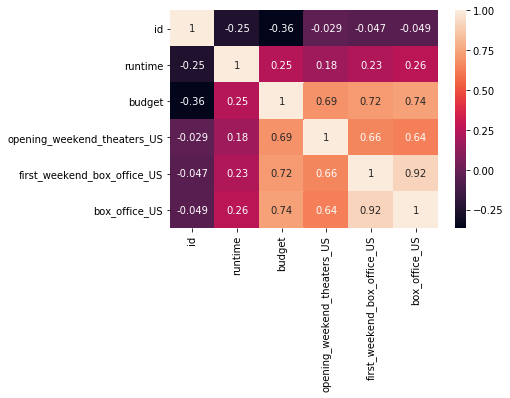

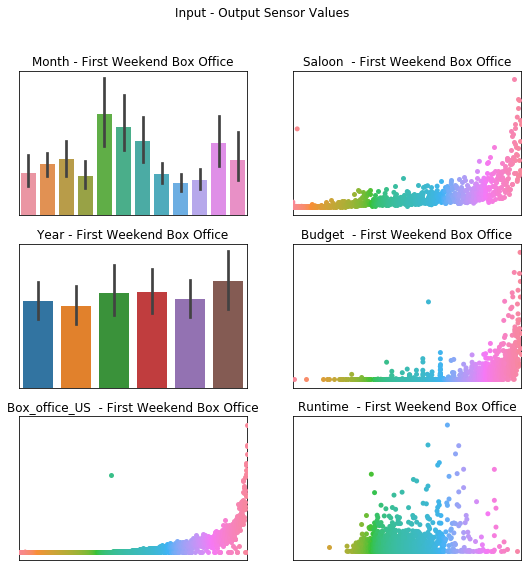

c:\users\asus-nb\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\asus-nb\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\asus-nb\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\a

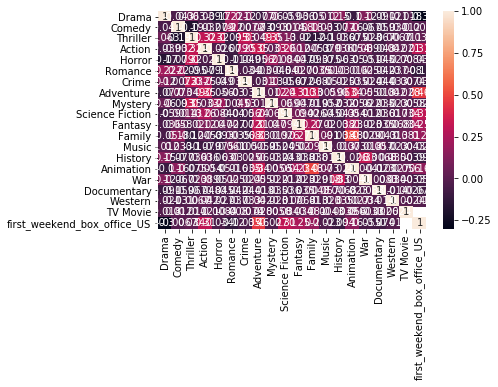

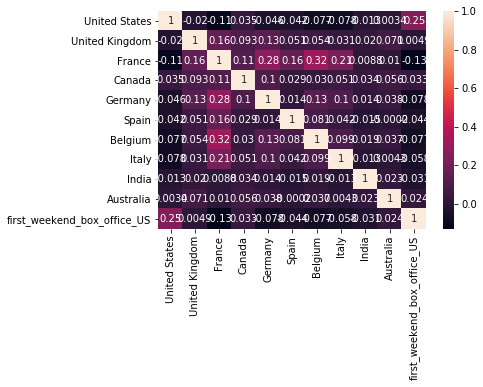

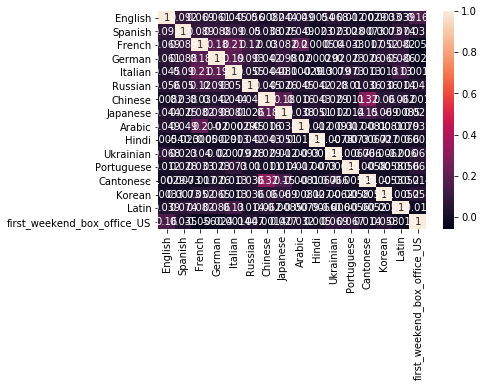

c:\users\asus-nb\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
c:\users\asus-nb\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\asus-nb\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

null rows in features: 
runtime                             0
budget                              0
opening_weekend_theaters_US         0
first_weekend_box_office_US         0
box_office_US                       0
                                   ..
Greenland                           0
Guadeloupe                          0
Cameroon                            0
Lao People's Democratic Republic    0
Antarctica                          0
Length: 223, dtype: int64
                           Specs        Score
3                  box_office_US  8094.522096
1                         budget  1597.324523
2    opening_weekend_theaters_US  1131.566458
28                     Adventure   388.675250
29               Science Fiction   162.276950
24                        Action   155.407353
26                         Drama   145.243180
32                       Fantasy    98.446787
124                United States    97.099535
0                        runtime    83.935439
30                        

c:\users\asus-nb\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py:1974: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
c:\users\asus-nb\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


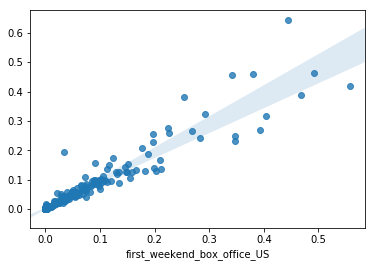

In [47]:


def read_data():

    data = pd.read_csv('sample_data.csv')
    #print(data.describe())
    correlation(data)

    data["year"] = [t.year for t in pd.DatetimeIndex(data.release_date_US)]
    data["month"] = [t.month for t in pd.DatetimeIndex(data.release_date_US)]
    draw_graph(data)

    month_dummies = pd.get_dummies(data['month'],
                                   prefix='month')

    year_dummies = pd.get_dummies(data['year'],
                                  prefix='year')

    data = pd.concat([data, month_dummies, year_dummies], axis=1)
    data.drop(["month", "year"], inplace=True, axis=1)

    # unwanted columns drop
    dropped_columns = ['id', 'release_date_US']
    data.drop(dropped_columns, inplace=True, axis=1)

    # duplicate drop
    duplicate_rows_df = data[data.duplicated()]
    data = data.drop_duplicates()

    # Categorical variable analysis
    categorical_data = categorical_variables(data)

    # null rows analysis
    # print("null rows in features: \n" + str(categorical_data.isnull().sum()))

    # dropped all the rows where target column has an empty or na values.
    dropped_data = categorical_data[categorical_data['first_weekend_box_office_US'].notna()]

    # filled with meadian rest of the features.
    for col in dropped_data.columns:
        if col not in categorical_list:
            if dropped_data[col].isnull().sum() > 0:
                median = dropped_data[col].median(skipna=True)
                dropped_data[col].fillna(median, inplace=True)

    print("null rows in features: \n" + str(dropped_data.isnull().sum()))

    #print("null rows in features: \n" + str(categorical_data.isnull().sum()))

    # normalization
    normalized_data = normalize(dropped_data)

    # feature selection
    best_features_list = feature_selection(normalized_data)
    best_data = normalized_data[best_features_list]
    print(best_data.columns)

    # ML Model training
    model(normalized_data, best_data)

read_data()